# Bouncing ball

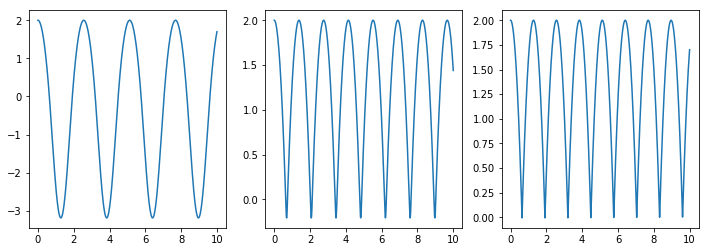

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

width = 0.0001

ts = np.linspace(0, 10, 2000)
def f(X, t, k):
    dx0 = X[1]
    dx1 = -9.8
    dx1 +=  - k * X[0] / (1 + np.exp(X[0]/width))
    return [dx0, dx1]

with np.errstate(over='ignore'):
    # don't print overflow warning messages from exp(),
    # and limit the step size so that the solver doesn't step too deep
    # into the forbidden region
    X1 = odeint(f, [2, 0], ts, args=(10,), hmax=0.01)
    X2 = odeint(f, [2, 0], ts, args=(1e3,), hmax=0.01)
    X3 = odeint(f, [2, 0], ts, args=(1e6,), hmax=0.01)
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(ts, X1[:, 0])
ax2.plot(ts, X2[:, 0])
ax3.plot(ts, X3[:, 0])
plt.show()

# Bouncing ball with damping

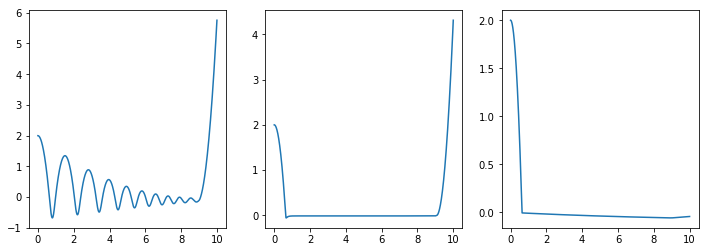

X2:4.307917163424603	X3:-0.043388714946864755


In [31]:
def f(X, t, k, c):
    dx0 = X[1]
    if t < 9:
        dx1 = -9.8
    else:
        dx1 = 9.8
    dx1 +=  (- k * X[0] - c * X[1]) / (1 + np.exp(X[0]/width))
    return [dx0, dx1]

with np.errstate(over='ignore'):
    # don't print overflow warning messages from exp(),
    # and limit the step size so that the solver doesn't step too deep
    # into the forbidden region
    X1 = odeint(f, [2, 0], ts, args=(100, 1), hmax=0.01)
    X2 = odeint(f, [2, 0], ts, args=(1000, 100), hmax=0.01)
    X3 = odeint(f, [2, 0], ts, args=(100, 1000), hmax=0.01)
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(ts, X1[:, 0])
ax2.plot(ts, X2[:, 0])
ax3.plot(ts, X3[:, 0])
plt.show()
print('X2:{}\tX3:{}'.format(X2[-1, 0], X3[-1, 0]))

Excessive damping reduce the potential of bouncing back